## Multi-class classification

> Indented block



Iris dataset https://en.wikipedia.org/wiki/Iris_flower_data_set

In [ ]:
!pip install sklearn

In [48]:
import numpy as np
import datetime, os
import math
import random
import torch
import matplotlib.pyplot as plt 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import itertools

## For this experiment we will use PyTorch framework

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6a98351f2a3b52b01c17b81cbea079dd4aef6ae2a63dcefacf53ebfaf3fa6259
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [4]:
!wget http://klevas.mif.vu.lt/~linp/output/2_iris.csv

--2023-02-10 21:53:09--  http://klevas.mif.vu.lt/~linp/output/2_iris.csv
Resolving klevas.mif.vu.lt (klevas.mif.vu.lt)... 193.219.42.12
Connecting to klevas.mif.vu.lt (klevas.mif.vu.lt)|193.219.42.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2850 (2.8K) [text/csv]
Saving to: ‘2_iris.csv’

2_iris.csv          100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-10 21:53:10 (400 MB/s) - ‘2_iris.csv’ saved [2850/2850]



#### Check if GPU is available

In [5]:
!nvidia-smi

Fri Feb 10 21:53:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
# nuskaitome duomenis
data = np.genfromtxt("./2_iris.csv", delimiter='\t') 

# paskirstome apmokymas, validavimas, testavimas
N_samples = data.shape[0]
N_train = int(N_samples * 0.7) # 70% apmokymas
N_val = int(N_samples * 0.8) # 10% validavimas
N_test = N_samples - N_train - N_val

In [7]:
N_samples

150

In [8]:
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [9]:

# randomizuojame stebėjimus
shuffle_data = [x for x in np.random.permutation(N_samples)]
data = data[shuffle_data,:]


In [10]:
data

array([[5.2, 3.4, 1.4, 0.2, 0. ],
       [6.5, 2.8, 4.6, 1.5, 1. ],
       [5.1, 3.8, 1.9, 0.4, 0. ],
       [6. , 2.2, 4. , 1. , 1. ],
       [4.8, 3.1, 1.6, 0.2, 0. ],
       [6.5, 3. , 5.5, 1.8, 2. ],
       [5.6, 2.8, 4.9, 2. , 2. ],
       [6.7, 3. , 5.2, 2.3, 2. ],
       [6.4, 2.8, 5.6, 2.2, 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [6.1, 2.9, 4.7, 1.4, 1. ],
       [5.9, 3. , 4.2, 1.5, 1. ],
       [5.5, 4.2, 1.4, 0.2, 0. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [6.9, 3.1, 5.4, 2.1, 2. ],
       [6.1, 3. , 4.9, 1.8, 2. ],
       [7.3, 2.9, 6.3, 1.8, 2. ],
       [6.8, 3.2, 5.9, 2.3, 2. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.3, 3.3, 6. , 2.5, 2. ],
       [4.5, 2.3, 1.3, 0.3, 0. ],
       [5.8, 2.8, 5.1, 2.4, 2. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [5.8, 2.6, 4. , 1.2, 1. ],
       [4.8, 3. , 1.4, 0.3, 0. ],
       [6.7, 3.3, 5.7, 2.1, 2. ],
       [5.7, 2

In [11]:
## fiktyvių kintamųjų sukūrimas
def batch_to_one_hot(id, batch_size, nb_classes = 10):
    y_onehot = torch.FloatTensor(batch_size, nb_classes)
    y_onehot.zero_()
    y_onehot.scatter_(1, id.view(-1, 1), 1)
    return y_onehot.long()

In [12]:

# Duomenų skaidymas -> test, validation, test
data_train = torch.tensor(data[:N_train,:4]).float()
y_train = torch.tensor(data[:N_train,4], dtype= torch.int64)
y_train = batch_to_one_hot(y_train, y_train.shape[0], 3)
data_train.shape

data_val = torch.tensor(data[N_train:N_val,:4]).float()
y_val = torch.tensor(data[N_train:N_val,4], dtype= torch.int64)
y_val = batch_to_one_hot(y_val, y_val.shape[0], 3)
data_val.shape

data_test = torch.tensor(data[N_val:,:4]).float()
y_test = torch.tensor(data[N_val:,4], dtype= torch.int64)
y_test = batch_to_one_hot(y_test, y_test.shape[0], 3)
data_test.shape

torch.Size([30, 4])

In [13]:
y_train

tensor([[1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 

In [14]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.fc2 = nn.Linear(100, 15)
        self.bn2 = nn.BatchNorm1d(15)
        self.fc3 = nn.Linear(15, 3)
        self.softmax = nn.Softmax()
        self.drop = nn.Dropout(p=0.4)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.drop(X)
        X = self.bn1(X)
        X = self.fc2(X)
        X = self.drop(X)
        X = self.bn2(X)
        X = self.fc3(X)
        X = F.softmax(X)

        return X

model = NeuralNet()

In [15]:
# apibrėžiame nuostolių f-ją
loss_func =  nn.CrossEntropyLoss() 

In [16]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss_func(input, target)
input, target

(tensor([[ 1.1460, -0.9503,  0.8680, -1.7502, -0.7124],
         [-1.6176, -0.1357,  0.1470, -1.7259,  0.7522],
         [-0.9164,  0.0945,  1.5724, -0.0731, -0.0481]], requires_grad=True),
 tensor([3, 2, 4]))

In [17]:

# pasirenkame optimizatorių
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
# iteracijų (epochų skaičius) kiek ilgai iteraciškai vertinsime parametrus
n_epochs = 10

for epoch in range(0, n_epochs+1):

    # pirmą epochą netreniruosim, kad tensorboard turėtų pradinį tašką
    if epoch == 0:
      torch.set_grad_enabled(False)

    # stebėjime tikslo f-jos pokytį
    train_loss = 0.0
    validation_loss = 0.0
    train_acc = 0.0
    validation_acc = 0.0
    
    #########################################################
    # Modelio parametrų vertinimas (angl. training)          #
    #########################################################

    # nunuliname preitos operacijos gradientą
    optimizer.zero_grad()
    # Praleidžiame duomenis X pro modelį, gauname prognozę yhat
    outputs = model(data_train)
    
    # apskaičiuojam tikslumą
    with torch.no_grad():
      outputLabels = torch.argmax(outputs, 1)
      yLabels = torch.argmax(y_train, 1)
      accuracy = yLabels == outputLabels
      train_acc += torch.sum(accuracy.float())

    # skaičiuojame, nuostolius, kiek prognozė yhat, skiriasi nuo tiktų reikšmių
    loss = loss_func(outputs, yLabels)

    # apskaičiuojame gradientų reikšmes, visiems nežinomiems parametrams
    if epoch != 0:
      loss.backward()
    # atnaujiname, visus nežinomus, modelio parametrus
    optimizer.step()
    # skaičiuojame bendrą nuostolį
    train_loss += loss.item()*data_train.size(0)
        
        
    
    ##############################################################
    # Modelio kokybės vertinimas, mokymo metu (angl. validation) #
    ##############################################################
    # pasiimame duomenų rinkinio poaibį (X, y)
    # Praleidžiame duomenis X pro modelį, gauname prognozę yhat
    outputs = model(data_val)
    # skaičiuojame, nuostolius, kiek prognozė yhat, skiriasi nuo tiktų reikšmių
    yLabels = torch.argmax(y_val, 1)
    loss = loss_func(outputs, yLabels)
    # skaičiuojame bendrą nuostolį
    validation_loss += loss.item()*data_val.size(0)

    # skaičiuojame bendrą tikslumą
    with torch.no_grad():
      outputLabels = torch.argmax(outputs, 1)
      accuracy = yLabels == outputLabels
      validation_acc += torch.sum(accuracy.float())

    # validacijos metu, nes nekeičiame parametrų, tik pasižiūrime, kaip modelis 
    # mokinimo metu veikia ant nematytų duomenų
            
    # spausdiname tarpines statistikas
    print('Epocha: {} \t Nuostoliai: {:.10f} \t Tikslumas: {:.3f} \t Validacijos nuostoliai: {:.10f} \t Validacijos tikslumas: {:.3f}'.format(
        epoch, 
        train_loss / N_train,
        train_acc / N_train,
        validation_loss / N_val,
        validation_acc / N_val,
        ))
    
    if epoch == 0:
      torch.set_grad_enabled(True)

test_loss = 0.0
################################################################
# Nepriklausomas modelio testavimas, po mokymo (angl. testing) #
################################################################
# pasiimame duomenų rinkinio poaibį (X, y)

# Praleidžiame duomenis X pro modelį, gauname prognozę yhat
outputs = model(data_test)
# skaičiuojame bendrą nuostolį
yLabels = torch.argmax(y_test, 1)
loss = loss_func(outputs, yLabels)
# skaičiuojame bendrą nuostolį
test_loss += loss.item()*data_test.size(0)

print('Epocha: {} \t Testavimo nuostoliai (Nematyti duomenys): {:.10f}'.format(
    epoch, 
    test_loss / N_test
    ))

<ipython-input-14-ce223dff9d81>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.softmax(X)


Epocha: 0 	 Nuostoliai: 1.1089252234 	 Tikslumas: 0.324 	 Validacijos nuostoliai: 0.1303797215 	 Validacijos tikslumas: 0.067
Epocha: 1 	 Nuostoliai: 1.1017767191 	 Tikslumas: 0.314 	 Validacijos nuostoliai: 0.1330764294 	 Validacijos tikslumas: 0.042
Epocha: 2 	 Nuostoliai: 1.0932755470 	 Tikslumas: 0.324 	 Validacijos nuostoliai: 0.1264829040 	 Validacijos tikslumas: 0.083
Epocha: 3 	 Nuostoliai: 1.0677976608 	 Tikslumas: 0.495 	 Validacijos nuostoliai: 0.1247889847 	 Validacijos tikslumas: 0.075
Epocha: 4 	 Nuostoliai: 1.0590981245 	 Tikslumas: 0.467 	 Validacijos nuostoliai: 0.1287836581 	 Validacijos tikslumas: 0.058
Epocha: 5 	 Nuostoliai: 1.0427829027 	 Tikslumas: 0.543 	 Validacijos nuostoliai: 0.1204951480 	 Validacijos tikslumas: 0.100
Epocha: 6 	 Nuostoliai: 1.0364747047 	 Tikslumas: 0.552 	 Validacijos nuostoliai: 0.1243735179 	 Validacijos tikslumas: 0.083
Epocha: 7 	 Nuostoliai: 1.0339019299 	 Tikslumas: 0.495 	 Validacijos nuostoliai: 0.1242725030 	 Validacijos tikslumas

In [19]:
outputs

tensor([[0.2000, 0.3492, 0.4508],
        [0.1136, 0.3078, 0.5786],
        [0.2517, 0.3462, 0.4021],
        [0.0552, 0.1897, 0.7551],
        [0.4908, 0.3337, 0.1755],
        [0.5145, 0.3387, 0.1468],
        [0.4424, 0.2860, 0.2716],
        [0.3348, 0.3018, 0.3634],
        [0.6019, 0.2736, 0.1246],
        [0.1621, 0.4438, 0.3941],
        [0.3674, 0.3350, 0.2976],
        [0.0985, 0.3316, 0.5699],
        [0.3973, 0.3896, 0.2131],
        [0.3044, 0.3133, 0.3823],
        [0.2673, 0.3430, 0.3897],
        [0.7313, 0.1622, 0.1065],
        [0.1617, 0.2174, 0.6209],
        [0.1094, 0.1010, 0.7897],
        [0.3690, 0.4239, 0.2070],
        [0.2277, 0.1866, 0.5857],
        [0.6604, 0.2546, 0.0850],
        [0.3470, 0.3824, 0.2706],
        [0.0881, 0.3114, 0.6006],
        [0.2758, 0.4306, 0.2936],
        [0.7451, 0.1900, 0.0649],
        [0.5437, 0.3054, 0.1509],
        [0.2061, 0.3268, 0.4671],
        [0.5008, 0.3224, 0.1768],
        [0.0641, 0.3911, 0.5447],
        [0.199

In [29]:

# test model on unseen (test) data
predictions = model(data_test)
predictions
predicted_classes = torch.argmax(predictions, axis = 1)
predicted_classes
predicted = batch_to_one_hot(predicted_classes, predictions.shape[0], 3)
predicted
# klasifikavimo lentelės:
confs = multilabel_confusion_matrix(y_test, predicted)
confs[0], confs[1], confs[2]


<ipython-input-14-ce223dff9d81>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.softmax(X)


(array([[14,  2],
        [ 5,  9]]), array([[11,  6],
        [13,  0]]), array([[15, 12],
        [ 2,  1]]))

Text(0.5, 15.0, 'Prognozė')

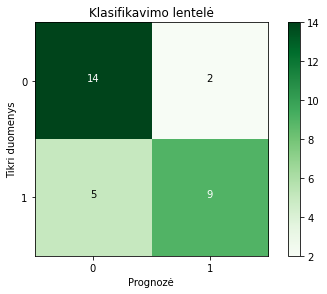

In [32]:
conf = confs[0] # pirmos klasės atžvilgiu

classes = [0, 1]
# Klasifikavimo lentelės vizualizavimas
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Klasifikavimo lentelė")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Tikri duomenys')
plt.xlabel('Prognozė')

In [21]:
predicted

tensor([[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1]])

In [22]:
predictions # this is - predicted values y hat 

tensor([[0.1412, 0.1406, 0.7181],
        [0.1140, 0.2914, 0.5946],
        [0.0463, 0.3263, 0.6274],
        [0.1973, 0.3026, 0.5001],
        [0.5998, 0.2703, 0.1299],
        [0.4241, 0.3336, 0.2423],
        [0.6061, 0.2554, 0.1385],
        [0.4656, 0.3154, 0.2190],
        [0.4940, 0.3462, 0.1598],
        [0.3345, 0.3541, 0.3114],
        [0.2705, 0.3979, 0.3316],
        [0.2174, 0.1993, 0.5832],
        [0.4062, 0.3494, 0.2444],
        [0.3431, 0.4203, 0.2366],
        [0.4709, 0.2454, 0.2837],
        [0.2895, 0.4217, 0.2888],
        [0.2174, 0.3874, 0.3951],
        [0.1682, 0.2521, 0.5797],
        [0.4760, 0.3475, 0.1765],
        [0.1926, 0.4164, 0.3909],
        [0.4237, 0.4098, 0.1665],
        [0.1754, 0.4573, 0.3673],
        [0.4168, 0.2806, 0.3026],
        [0.1592, 0.3067, 0.5340],
        [0.4811, 0.1079, 0.4110],
        [0.5581, 0.2704, 0.1714],
        [0.1863, 0.4615, 0.3522],
        [0.5778, 0.2106, 0.2115],
        [0.3964, 0.3811, 0.2225],
        [0.028

In [33]:
# from the confusion matrix
TP = conf[1,1]
TN = conf[0,0]
FP = conf[0,1]
FN = conf[1,0]

### Some basic metrics

Now, we will calculate some basic metrics from these four values.  
We will need a dictionary to store these metrics. Lets create a dictionary `results`.

In [34]:
results = {}

#### Accuracy 
number of examples correctly predicted / total number of examples  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [35]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.767


#### True Positive Rate
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


In [36]:
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.643


#### True Negative Rate
number of samples actually and predicted as  `Negative` / total number of samples actually  `Negative`  
Also called **Specificity**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)


In [37]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.875


#### Positive Predictive Value
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)


In [38]:
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.818


#### Negative Predictive Value
number of samples actually and predicted as  `Negative` / total number of samples predicted as `Negative`    
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6da0f59faffbc1704974e97847ab4fa599f5521)


In [39]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  0.737


#### F1 score
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [40]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.720


#### Matthew's correlation coefficient
Matthew's coefficient range between `[-1, 1]`. `0` usually means totally random predictions. `1` means a perfect classifier, while a negative value (`[-1, 0)`) suggests a negative correlation between predictions and actual values.   
Here' the formual for MCC  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5caa90fc15105b74b59a30bbc9cc2e5bd43a13b7)

In [41]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.536


### Comparing these calculated metrics
Let's check if these values match with the values calculated from `scikit-learn`'s functions.

In [54]:
print(f"Calculated and Actual Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test[:,0], predicted[:,0]): .3f}")
print(f"Calculated and Actual Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test[:,0], predicted[:,0]): .3f}")
print(f"Calculated and Actual Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test[:,0], predicted[:,0]): .3f}")
print(f"Calculated and Actual F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test[:,0], predicted[:,0]): .3f}")
print(f"Calculated and Actual Matthew's correlation coefficient: {results['MCC']: .3f}, {metrics.matthews_corrcoef(y_test[:,0], predicted[:,0]): .3f}")

Calculated and Actual Accuracy:                           0.767,  0.767
Calculated and Actual Precision score:                    0.818,  0.818
Calculated and Actual Recall score:                       0.643,  0.643
Calculated and Actual F1 score:                           0.720,  0.720
Calculated and Actual Matthew's correlation coefficient:  0.536,  0.536


## Error analysis

In [23]:
predictions

tensor([[0.1412, 0.1406, 0.7181],
        [0.1140, 0.2914, 0.5946],
        [0.0463, 0.3263, 0.6274],
        [0.1973, 0.3026, 0.5001],
        [0.5998, 0.2703, 0.1299],
        [0.4241, 0.3336, 0.2423],
        [0.6061, 0.2554, 0.1385],
        [0.4656, 0.3154, 0.2190],
        [0.4940, 0.3462, 0.1598],
        [0.3345, 0.3541, 0.3114],
        [0.2705, 0.3979, 0.3316],
        [0.2174, 0.1993, 0.5832],
        [0.4062, 0.3494, 0.2444],
        [0.3431, 0.4203, 0.2366],
        [0.4709, 0.2454, 0.2837],
        [0.2895, 0.4217, 0.2888],
        [0.2174, 0.3874, 0.3951],
        [0.1682, 0.2521, 0.5797],
        [0.4760, 0.3475, 0.1765],
        [0.1926, 0.4164, 0.3909],
        [0.4237, 0.4098, 0.1665],
        [0.1754, 0.4573, 0.3673],
        [0.4168, 0.2806, 0.3026],
        [0.1592, 0.3067, 0.5340],
        [0.4811, 0.1079, 0.4110],
        [0.5581, 0.2704, 0.1714],
        [0.1863, 0.4615, 0.3522],
        [0.5778, 0.2106, 0.2115],
        [0.3964, 0.3811, 0.2225],
        [0.028

In [43]:
np.log(predictions.detach().numpy()).shape

(30, 3)

In [44]:
y_test.detach().numpy().shape

(30, 3)

In [45]:
error = -np.sum(y_test.detach().numpy()*np.log(predictions.detach().numpy()),axis=1)
error

array([1.55210292, 1.3578229 , 1.22289729, 1.32139289, 0.63287973,
       1.08608174, 0.67816007, 1.25105023, 0.52507138, 1.37715089,
       0.98378676, 1.1145184 , 0.34683478, 1.18482292, 0.97898287,
       0.51941049, 1.17780364, 1.44546545, 0.3012234 , 0.88465494,
       1.21615362, 1.21181071, 0.88249475, 1.01897621, 0.76076221,
       0.41141716, 1.0585537 , 0.80611575, 1.19713116, 0.44676381])

In [46]:
err_idx = np.argsort(error)
err_idx

array([18, 12, 25, 29, 15,  8,  4,  6, 24, 27, 22, 19, 14, 10, 23, 26,  5,
       11, 16, 13, 28, 21, 20,  2,  7,  3,  1,  9, 17,  0])

In [47]:
y_test[err_idx], error[err_idx]

(tensor([[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         [0, 0, 1],
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         [0, 1, 0],
         [0, 0, 1],
         [1, 0, 0],
         [0, 1, 0],
         [0, 0, 1],
         [0, 1, 0],
         [1, 0, 0],
         [0, 1, 0],
         [0, 1, 0],
         [1, 0, 0],
         [0, 1, 0],
         [0, 1, 0],
         [1, 0, 0],
         [0, 1, 0],
         [1, 0, 0],
         [0, 1, 0],
         [0, 1, 0],
         [0, 1, 0],
         [0, 1, 0],
         [0, 1, 0]]),
 array([0.3012234 , 0.34683478, 0.41141716, 0.44676381, 0.51941049,
        0.52507138, 0.63287973, 0.67816007, 0.76076221, 0.80611575,
        0.88249475, 0.88465494, 0.97898287, 0.98378676, 1.01897621,
        1.0585537 , 1.08608174, 1.1145184 , 1.17780364, 1.18482292,
        1.19713116, 1.21181071, 1.21615362, 1.22289729, 1.25105023,
        1.32139289, 1.3578229 , 1.37715089, 1.44546545, 1.